##**Problem Statement**

**The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
Each app (row) has values for category, rating, size, and more. Another dataset contains customer reviews of the android apps.
Explore and analyze the data to discover key factors responsible for app engagement and success**.

Google Play Store is a major app distribution platform for Android users.There are thousands of applications for various purposes available here. As a result,the competition in the app market is quite intense. To carve their niche in this market, companies should go about it very strategically. App developers would benefit greatly from knowing what works and what does not work on Playstore.

***There comes data to our rescue!***

We can make use of historical data of Apps in Playstore. The Playstore apps data available to us contain details regarding the category, rating, size and several other factors about the apps. We also have another dataset containing the customer reviews of Android apps. By performing Exploratory Data Analysis on these datasets, we can figure out the key factors responsible for App Engagement and Success.

So,let's get started!

# **TODO (few key analysis):**
1. What are the top categories on Play Store?
2. Are majority of the apps Paid or Free?
3. How importance is the rating of the application?
4. What is the ratio of number of Paid apps and Free apps?
5. Which category has the most no. of installations?
6. How does the count of apps varies by Genres?
7. How does the last update has an effect on the rating?
8. How are ratings affected when the app is a paid one?
9. How are reviews and ratings co-related?
10. discuss the sentiment subjectivity.
11. Is subjectivity and polarity proportional to each other?
12. What is the percentage of review sentiments?
13. How is sentiment polarity varying for paid and free apps?
14. What is the distribution of prices for paid apps and how does the price of the app influence ratings and installs?
15. Distribution of App update over the Year.


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#importing datetime module
from datetime import datetime

In [ ]:
# reading both CSV Files From Drive and storing in dataframe
play_store_df = pd.read_csv("/content/drive/MyDrive/Module 1/Capstone_Project_1/Play Store Data.csv")
user_df = pd.read_csv("/content/drive/MyDrive/Module 1/Capstone_Project_1/User Reviews.csv")

## Exploring Dataset

In [ ]:
#first 5 rows of playstore data
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**PlayStore Apps dataset :**

There are 9 features that describe a given app.

* **App:** Name of the app
* **Category:** Category of the app.
* **Rating**: The current average rating (out of 5) of the app on Google Play
* **Reviews**: Number of user reviews given on the app
* **Size:** Size of the app in MB (megabytes)
* **Installs:** Total number of installs/downloads for an application.
* **Type**: Whether the app is paid or free
* **Price**: Price of the app in US$
* **Last Updated**: Date on which the app was last updated on Google Play
* **Current Ver** - The current version of the application.
* **Android Ver** - The android version which can support the application on its platform.

In [ ]:
#first 5 rows of user_review data
user_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


**User Review dataset.**
  * **App:** Contains the name of the app with a short description (optional).
  * **Translated Review:** It contains the English translation of the review dropped by the user of the app
  * **Sentiment:** sentiment is the view or opinion of the user about the app. the opinion may be Positive, Negative or Neutral.
  * **Sentiment_Polarity:** column contains values from -1 to 1. Where -1 is the most negative polarity and 1 is the most positive polarity. This column can also contain 0 which means neutral polarity.
  * **Sentiment_Subjectivity:** contains values ranging from 0 to 1 output that refers to personal opinions and judgments

In [ ]:
# Finding the number of rows and columns in the given dataset
play_store_df.shape

(10841, 13)

In [ ]:
#Overview of data
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
play_store_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## **Data Cleaning**

In [ ]:
play_store_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Dataset can contain missing values, numerical string value, various cues. If we can clean them, we can make easy our analysis.

## Category

In [ ]:
play_store_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

'1.9' is wrong value. So I have to see in which row '1.9' corresponds to.

In [ ]:
play_store_df[play_store_df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


* We can make NaN 'category' value. At that time we can get a clean data. I used shift() method that is found Pandas library.
* Also the rating is above 5. we will check futher if any ratings are above 5

In [ ]:
play_store_df.loc[10472] = play_store_df.loc[10472].shift()
play_store_df['App'].loc[10472] = play_store_df['Category'].loc[10472]
play_store_df['Category'].loc[10472] = np.nan
play_store_df.loc[10472]


App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

Later i realised that shifting these values wont help in betterment of data. so i had to drop this row.😅

In [ ]:
play_store_df.drop([10472], inplace=True)

In [ ]:
# Recheck
play_store_df[play_store_df['Rating'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## Rating

In [ ]:
# checking how many rating are more than 5 outlier
play_store_df[play_store_df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
play_store_df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2], dtype=object)

Data type of Rating is object. If we convert from string to numeric, we can make easy

In [ ]:
play_store_df['Rating'] = pd.to_numeric(play_store_df['Rating'], errors='coerce')  # Using errors='coerce' bcuz It will replace all non-numeric values with NaN
play_store_df['Rating'].dtype


dtype('float64')

## Reviews

In [ ]:
play_store_df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
#converting the datatype from object to float
play_store_df['Reviews'] = play_store_df.Reviews.replace("0.0",0)
play_store_df['Reviews'] = play_store_df['Reviews'].astype(float)
play_store_df['Reviews'].dtype


dtype('float64')

## Size

In [ ]:
play_store_df.Size.value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

In [ ]:
play_store_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Data type of Size is object. I had to convert the column because it contains the application sizes. Firstly I changed 'Varies with device' value with Nan. After, I dropped 'M' and 'k'. I changed from '1000+' to 1000. Finally, I converted numeric value.

In [ ]:
# Replacing/removing the string characters in  "Size" column

play_store_df['Size'] = play_store_df.Size.apply(lambda x: x.replace(',', ''))
play_store_df['Size'] = play_store_df.Size.apply(lambda x: x.replace('M', 'e+6'))
play_store_df['Size'] = play_store_df.Size.apply(lambda x: x.replace('k', 'e+3'))

#For the time being,replacing 'Varies with device' with Nan 
play_store_df['Size'] = play_store_df.Size.replace('Varies with device', np.NaN)

In [ ]:
#Changing datatype for "Size" column
play_store_df['Size']= play_store_df['Size'].apply(pd.to_numeric)

In [ ]:
#Converting the value in bytes to megabytes for easier interpretation
play_store_df['Size']=play_store_df['Size']/(10**6) 

## Installs

In [ ]:
play_store_df.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [ ]:
play_store_df['Installs'].unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

Data type of Size is object. I'm gonna make similar processes, which I made the in 'Size'.

In [ ]:
# Replacing/removing the string characters in "Installs" column
play_store_df['Installs']=play_store_df['Installs'].apply(lambda x: x.strip('+'))
play_store_df['Installs']=play_store_df['Installs'].apply(lambda x: x.replace(',',''))

#Changing datatype for "Installs" column
play_store_df['Installs']=play_store_df['Installs'].astype(int)

##  **Price**

In [ ]:
play_store_df.Price.value_counts().head(10)

0        10040
$0.99      148
$2.99      129
$1.99       73
$4.99       72
$3.99       63
$1.49       46
$5.99       30
$2.49       26
$9.99       21
Name: Price, dtype: int64

In [ ]:
play_store_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Data type of Price is object. I have made similar processes, which I made the in 'Size'.

In [ ]:
# play_store_df['Price'] = play_store_df.Price.replace("Everyone",np.nan)
play_store_df['Price'] = play_store_df.Price.str.replace("$","").astype(float)
play_store_df['Price'].dtype

<ipython-input-29-5b0d97a575bf>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  play_store_df['Price'] = play_store_df.Price.str.replace("$","").astype(float)


dtype('float64')

##**Last Updated**

In [ ]:
play_store_df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

Data type of Last Uptated is object. I converted from string to date type and extracting only year.

In [ ]:
play_store_df['Last Updated']=play_store_df['Last Updated'].apply(lambda x : datetime.strptime(x,"%B %d, %Y"))

In [ ]:
#Extracting year from 'Last Updated' column
play_store_df['Last_update_year']=play_store_df['Last Updated'].apply(lambda x :x.year)

## **Data Imputation**

In [ ]:
play_store_df['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

<Axes: xlabel='Rating'>

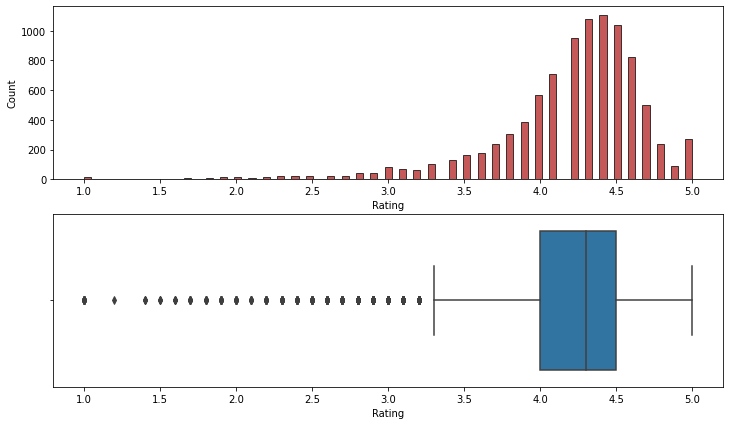

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.histplot(play_store_df['Rating'],color='firebrick',ax=ax[0])
sns.boxplot(x='Rating',data=play_store_df, ax=ax[1])

Most of the values in the Rating column lie above 4,indicating that the distribution is positively skewed.So, it is better to replace the null values with the median value of Rating.

In [ ]:
def impute_median(column):
  '''
  Imputing median value as NaN value for Numerical datatype.
  For 'Rating' column - Replacing NaN values with the median of a DataFrame column.
  '''
  return column.fillna(column.median(), inplace=True)

In [ ]:
# replacing NaN values with median value for Rating column
impute_median(play_store_df['Rating'])

<Axes: xlabel='Size'>

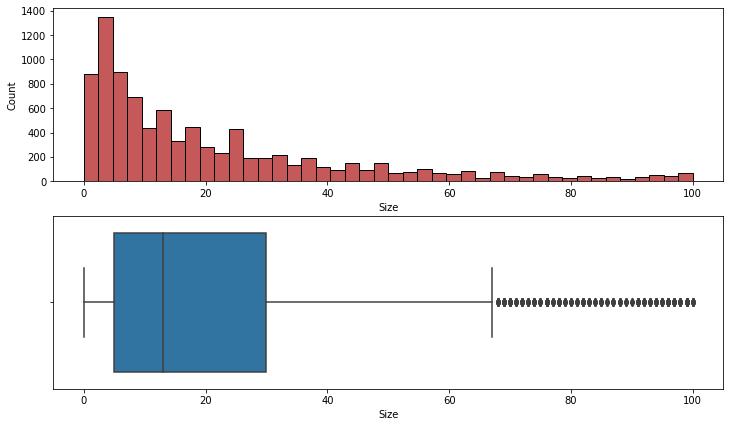

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.histplot(play_store_df['Size'],color='firebrick',ax=ax[0])
sns.boxplot(x='Size',data=play_store_df, ax=ax[1])

* It is clear from the visualizations that the data in the Size column is skewed 
towards the right.

* Also, we see that a vast majority of the entries in this column are of the value Varies with device, replacing this with any central tendency value (mean or median) may give incorrect visualizations and results. Hence these values are left as it is.

In [ ]:
def impute_mode(column):
  '''
  Imputing mode value as NaN value for Categorical datatype.
  For 'Type' column - Replacing NaN values with the mode of a DataFrame column.
  '''
  return column.fillna(str(column.mode()), inplace=True)

In [ ]:
# replacing NaN values with mode value for Type column
impute_mode(play_store_df['Type'])

(array([0, 1, 2]),
 [Text(0, 0, 'Free'),
  Text(1, 0, 'Paid'),
  Text(2, 0, '0    Free\nName: Type, dtype: object')])

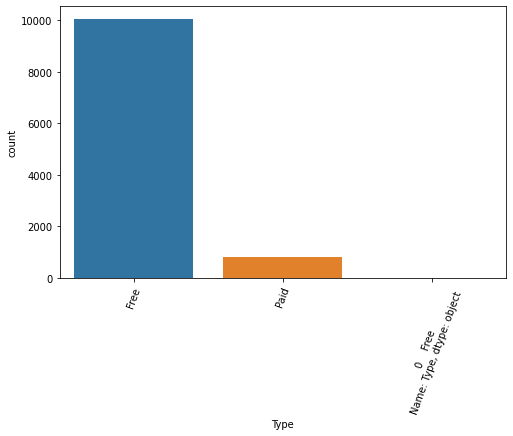

In [ ]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(x='Type',data=play_store_df)
plt.xticks(rotation=70)

Sometimes Replacing NaN value in categorical column using mode function tend to give incorrect visualization/results and also you can see here it has created another sepearate column, which is an error and also it is indicated as '0'. so i assigned it with "Free"

In [ ]:
play_store_df.loc[9148,'Type']='Free'

In [ ]:
play_store_df[play_store_df["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_update_year
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230.0,11.0,1000,Paid,1.49,Everyone,Personalization,2018-07-20,4.4,NaN,2018
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189.0,2.1,10000,Free,0.00,Everyone,Personalization,2018-03-27,1.1,NaN,2018


Since the NaN values in the Android Ver column cannot be replaced by any particular value and since there are only 2 rows which contain NaN values in this column, which accounts to less than 0.02% of the total rows in the given dataset, it can be be dropped.

In [ ]:
play_store_df=play_store_df[play_store_df['Android Ver'].notna()]
play_store_df.shape

(10838, 14)

In [ ]:
play_store_df[play_store_df["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_update_year
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55.0,2.700,5000,Free,0.00,Everyone,Art & Design,2018-06-06,NaN,4.2 and up,2018
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145.0,0.011,1000000,Free,0.00,Everyone,Libraries & Demo,2013-02-12,NaN,1.5 and up,2013
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010.0,8.700,500000,Free,0.00,Everyone,Tools,2017-05-10,NaN,4.0 and up,2017
6803,BT Master,FAMILY,4.3,0.0,0.222,100,Free,0.00,Everyone,Education,2016-11-06,NaN,1.6 and up,2016
7333,Dots puzzle,FAMILY,4.0,179.0,14.000,50000,Paid,0.99,Everyone,Puzzle,2018-04-18,NaN,4.0 and up,2018
7407,Calculate My IQ,FAMILY,4.3,44.0,7.200,10000,Free,0.00,Everyone,Entertainment,2017-04-03,NaN,2.3 and up,2017
7730,UFO-CQ,TOOLS,4.3,1.0,0.237,10,Paid,0.99,Everyone,Tools,2016-07-04,NaN,2.0 and up,2016
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8.0,0.658,1000,Free,0.00,Everyone,Books & Reference,2017-01-31,NaN,3.0 and up,2017


Since there are only 8 rows which contain NaN values in the 'Current Ver' column and there is no particular value with which we can replace it, these rows can be dropped.

In [ ]:
play_store_df=play_store_df[play_store_df["Current Ver"].notna()]
play_store_df.shape

(10830, 14)

## **sanity checks**

In [ ]:
#rated apps with zero installs and reviews
play_store_df[(play_store_df['Installs']==0)&play_store_df['Rating']>0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_update_year
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,4.3,0.0,5.5,0,Paid,1.49,Everyone,Personalization,2018-07-11,1.1,4.2 and up,2018
5307,Ak Parti Yardım Toplama,SOCIAL,4.3,0.0,8.7,0,Paid,13.99,Teen,Social,2017-07-28,3.4.4.3.3,4.1 and up,2017
5486,AP Series Solution Pro,FAMILY,4.3,0.0,7.4,0,Paid,1.99,Everyone,Education,2017-07-30,1.3,4.0 and up,2017
5945,Ain Arabic Kids Alif Ba ta,FAMILY,4.3,0.0,33.0,0,Paid,2.99,Everyone,Education,2016-04-15,1.0,3.0 and up,2016
6692,cronometra-br,PRODUCTIVITY,4.3,0.0,5.4,0,Paid,154.99,Everyone,Productivity,2017-11-24,1.0.0,4.1 and up,2017
7434,Pekalongan CJ,SOCIAL,4.3,0.0,5.9,0,Free,0.00,Teen,Social,2018-07-21,0.0.1,4.4 and up,2018
8081,CX Network,BUSINESS,4.3,0.0,10.0,0,Free,0.00,Everyone,Business,2018-08-06,1.3.1,4.1 and up,2018
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,4.3,0.0,2.1,0,Free,0.00,Everyone,News & Magazines,2018-07-07,1.1,4.4 and up,2018
8871,Test Application DT 02,ART_AND_DESIGN,4.3,0.0,1.2,0,Free,0.00,Everyone,Art & Design,2017-03-14,4.0,4.2 and up,2017
9148,Command & Conquer: Rivals,FAMILY,4.3,0.0,NaN,0,Free,0.00,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device,2018


Ratings given without installing the app ,does not truely represent people's opinion.So let's drop these rows

In [ ]:
play_store_df.drop(play_store_df[(play_store_df['Installs']==0)&(play_store_df['Rating']>0)].index , inplace=True)

**Inspecting the outliers in Installs column**

In [ ]:
#inspecting the apps with 100M+ downloads
installs_100M_above=play_store_df[play_store_df['Installs']>=(10**8)].sort_values(by='Installs',ascending=False)[['App','Category','Installs','Reviews']]
installs_100M_above

,App,Category,Installs,Reviews
3223,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,1000000000,9235373.0
4104,Messenger – Text and Video Chat for Free,COMMUNICATION,1000000000,56642847.0
865,Google Play Games,ENTERTAINMENT,1000000000,7165362.0
4170,Google Drive,PRODUCTIVITY,1000000000,2728941.0
3127,Google Street View,TRAVEL_AND_LOCAL,1000000000,2129689.0
...,...,...,...,...
2090,Minion Rush: Despicable Me Official Game,FAMILY,100000000,10216997.0
2088,ROBLOX,FAMILY,100000000,4450855.0
2056,Duolingo: Learn Languages Free,FAMILY,100000000,6294400.0
2050,Minion Rush: Despicable Me Official Game,FAMILY,100000000,10216997.0


In [ ]:
reviews_1M_above=play_store_df[play_store_df['Reviews']>=(10**6)].sort_values(by='Reviews',ascending=False)[['App','Category','Installs','Reviews']]
reviews_1M_above

,App,Category,Installs,Reviews
2544,Facebook,SOCIAL,1000000000,78158306.0
3943,Facebook,SOCIAL,1000000000,78128208.0
336,WhatsApp Messenger,COMMUNICATION,1000000000,69119316.0
381,WhatsApp Messenger,COMMUNICATION,1000000000,69119316.0
3904,WhatsApp Messenger,COMMUNICATION,1000000000,69109672.0
...,...,...,...,...
1929,Kick the Buddy,GAME,50000000,1003269.0
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,100000000,1002861.0
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,100000000,1002859.0
1671,Kick the Buddy,GAME,50000000,1000417.0


It is highly likely that certain apps have more installs and reviews than average.So,the occurence of such large values are justifiable.

**Handling outliers in 'Price' column**

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(-50.0, 0, '−50'),
  Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350'),
  Text(400.0, 0, '400'),
  Text(450.0, 0, '450')])

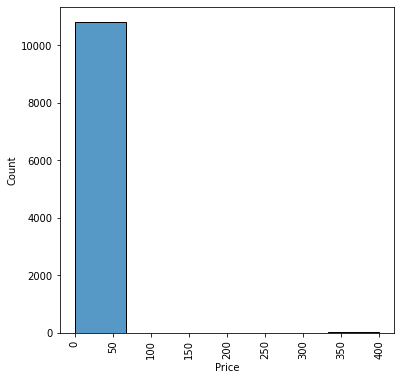

In [ ]:
#Price distibution plot for paid apps
plt.figure(figsize = (6,6))
Paid_apps_df=play_store_df[play_store_df['Type']=='Paid']
sns.histplot(x=play_store_df['Price'],bins=6)
plt.xticks(rotation=90)

Most of the paid apps are priced under 100.Which are the apps priced above 100?Let's find out

In [ ]:
# Apps whose Price is greater than or equal to 100

apps_equal_or_above_100= play_store_df[play_store_df['Price'] >99]
apps_equal_or_above_100[['Category', 'App', 'Price','Installs']]
#['Category',= 'App', 'Price','Installs']

,Category,App,Price,Installs
4197,FAMILY,most expensive app (H),399.99,100
4362,LIFESTYLE,💎 I'm rich,399.99,10000
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00,10000
5351,LIFESTYLE,I am rich,399.99,100000
5354,FAMILY,I am Rich Plus,399.99,10000
5355,LIFESTYLE,I am rich VIP,299.99,10000
5356,FINANCE,I Am Rich Premium,399.99,50000
5357,LIFESTYLE,I am extremely Rich,379.99,1000
5358,FINANCE,I am Rich!,399.99,1000
5359,FINANCE,I am rich(premium),399.99,5000


Most of these apps appear to be junk applications judging by their names. So, it is better to drop these rows

In [ ]:
#Dropping rows with abnormally high prices
play_store_df.drop(apps_equal_or_above_100.index, inplace = True)

In [ ]:
play_store_df.describe()

,Rating,Reviews,Size,Installs,Price,Last_update_year
count,10799.000000,1.079900e+04,9105.000000,1.079900e+04,10799.000000,10799.000000
mean,4.206852,4.458360e+05,21.570474,1.552289e+07,0.365584,2017.400130
std,0.480759,2.933186e+06,22.608245,8.518532e+07,2.503075,1.101281
min,1.000000,0.000000e+00,0.008500,1.000000e+00,0.000000,2010.000000
25%,4.100000,3.800000e+01,4.900000,5.000000e+03,0.000000,2017.000000
50%,4.300000,2.142000e+03,13.000000,1.000000e+05,0.000000,2018.000000
75%,4.500000,5.534650e+04,30.000000,5.000000e+06,0.000000,2018.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,89.990000,2018.000000


* The datatypes of all the columns have been corrected.
* The missing values in the dataset were handled,suitably
* The outliers were handled appropriately.

## **Handling Duplicate Values**

Handling the duplicates in the "App" column

In [ ]:
play_store_df['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Candy Crush Saga                                     7
Duolingo: Learn Languages Free                       7
                                                    ..
What U See                                           1
[verify-U] VideoIdent                                1
See U - Random video chat, video chat                1
DRC Sim - Wii U Gamepad                              1
iHoroscope - 2018 Daily Horoscope & Astrology        1
Name: App, Length: 9618, dtype: int64

In [ ]:
play_store_df[play_store_df['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_update_year
1653,ROBLOX,GAME,4.5,4447388.0,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,2018
1701,ROBLOX,GAME,4.5,4447346.0,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,2018
1748,ROBLOX,GAME,4.5,4448791.0,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,2018
1841,ROBLOX,GAME,4.5,4449882.0,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,2018
1870,ROBLOX,GAME,4.5,4449910.0,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,2018
2016,ROBLOX,FAMILY,4.5,4449910.0,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,2018
2088,ROBLOX,FAMILY,4.5,4450855.0,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,2018
2206,ROBLOX,FAMILY,4.5,4450890.0,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,2018
4527,ROBLOX,FAMILY,4.5,4443407.0,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,2018


In ROBLOX app, it should be either from game category or from family catagory.

From the above data we can see that there are lots of duplicate values for the same app. To remove the duplicate values we will first sort the dataframe by 'Last Updated' date in descending order then we will remove the duplicates. In this way we will get the information for the latest entry in the database.

In [ ]:
# sorting the dataset in descending order of Last Updated date.
play_store_df.sort_values(by = 'Last Updated', ascending = False, inplace = True)

In [ ]:
# deleting the duplicate entries of App.
play_store_df.drop_duplicates(subset = ['App'], inplace = True)

In [ ]:
# Checking whether the duplicates in the 'App' column are taken care of or not
play_store_df[play_store_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_update_year
2016,ROBLOX,FAMILY,4.5,4449910.0,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,2018


In [ ]:
play_store_df.shape

(9618, 14)

We have successfully handled all the duplicate values in the App column. The resultant number of rows after droping the duplicate rows in the app column come out to be 9649.

## **User Review Dataframe**

In [ ]:
user_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
user_df.shape

(64295, 5)

In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
user_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

There are a lot of NaN values. We need to analyse these values and see how we can handle them.

In [ ]:
# checking the NaN values in the translated rview column
user_df[user_df['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


There are a total of 26868 rows containing NaN values in the Translated_Review column.

We can say that the apps which do not have a review (NaN value insted) tend to have NaN values in the columns Sentiment, Sentiment_Polarity, and Sentiment_Subjectivity in the majority of the cases.

Lets check if there are any exceptions.

In [ ]:
user_df[user_df['Translated_Review'].isnull() & user_df['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In the few exceptional cases where the values of remaining columns are non null for null values in the translated_Review column, there seems to be errors. This is because the Sentiment, sentiment ploarity and sentiment subjectivity of the review can be determined if and only if there is a corresponding review.

Hence these values are wrong and can be deleted altogather.

In [ ]:
user_df.dropna(inplace = True)

In [ ]:
user_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [ ]:
user_df.shape

(37427, 5)

All the null values have been eliminated

## **Sanity checks**

In [ ]:
#inspecting elements in the Sentiment_Polarity column
user_df[(user_df['Sentiment_Polarity']>1) | (user_df['Sentiment_Polarity']<-1)]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


Therefore, all the elements in Sentiment_Polarity lie within the range [-1,1].



In [ ]:
#inspecting elements in the Sentiment_Sujectivity column
user_df[(user_df['Sentiment_Subjectivity']<0) | (user_df['Sentiment_Subjectivity']>1)]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


Therefore, all the elements in Sentiment_Subjectivity lie within the range [0,1].

In [ ]:
#The number of unique apps in User Review dataframe
user_df['App'].nunique()

865

After cleaning,The User Review dataframe UR_df contains the reviews for 865 applications

# **Data Visualization**

## **Correlation Heatmap for playstore data**

In [ ]:
#Correlation heatmap of numerical features in Playstore dataset
play_store_df.corr()

,Rating,Reviews,Size,Installs,Price,Last_update_year
Rating,1.000000,0.050235,0.045141,0.034322,0.021436,0.114576
Reviews,0.050235,1.000000,0.179270,0.625043,-0.017093,0.058159
Size,0.045141,0.179270,1.000000,0.134084,-0.000300,0.208599
Installs,0.034322,0.625043,0.134084,1.000000,-0.021706,0.068913
Price,0.021436,-0.017093,-0.000300,-0.021706,1.000000,-0.081022
Last_update_year,0.114576,0.058159,0.208599,0.068913,-0.081022,1.000000


Text(0.5, 1.0, 'Corelation Heatmap for Playstore Data')

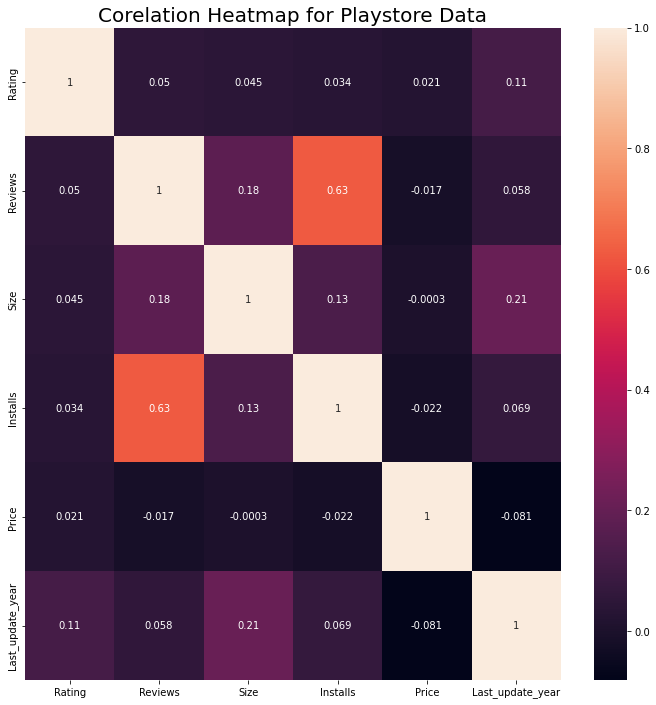

In [ ]:
plt.figure(figsize = (12,12))
sns.heatmap(play_store_df.corr(), annot= True)
plt.title('Corelation Heatmap for Playstore Data', size=20)

* There is a strong positive correlation between the Reviews and Installs column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.
* The Price is slightly negatively correlated with the Rating, Reviews, and Installs. This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.
*The Rating is slightly positively correlated with the Installs and Reviews column. This indicates that as the the average user rating increases, the app installs and number of reviews also increase.

## **Distribution plots of Installs and Rating**

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 [Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5'),
  Text(5.0, 0, '5.0'),
  Text(5.5, 0, '5.5')])

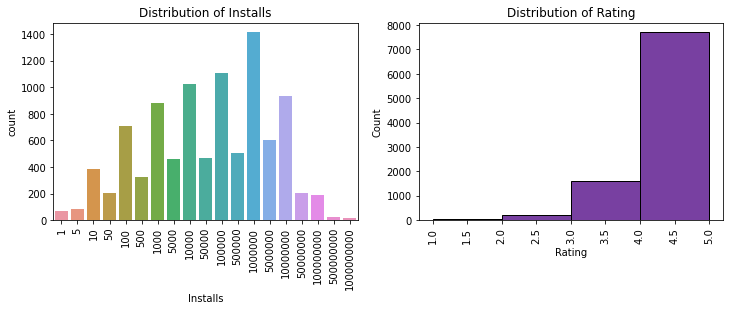

In [ ]:
#Distribution plots of Performance Indicators
fig = plt.figure(figsize=(12,8))


plt.subplot(2,2,1)
# sns.countplot(play_store_df['Installs'],color='green')
sns.countplot(x='Installs', data=play_store_df)
plt.title('Distribution of Installs')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.histplot(play_store_df['Rating'],bins=4,color='indigo')
plt.title('Distribution of Rating')
plt.xticks(rotation=90)


* Most of the apps in the Play store have a rating of at least 4.
* Majority of apps in the Google Play Store have fewer than five million downloads(79.46%).

##**Which are the most downloaded app categories?**

Text(0.5, 1.0, 'Total app installs in each category')

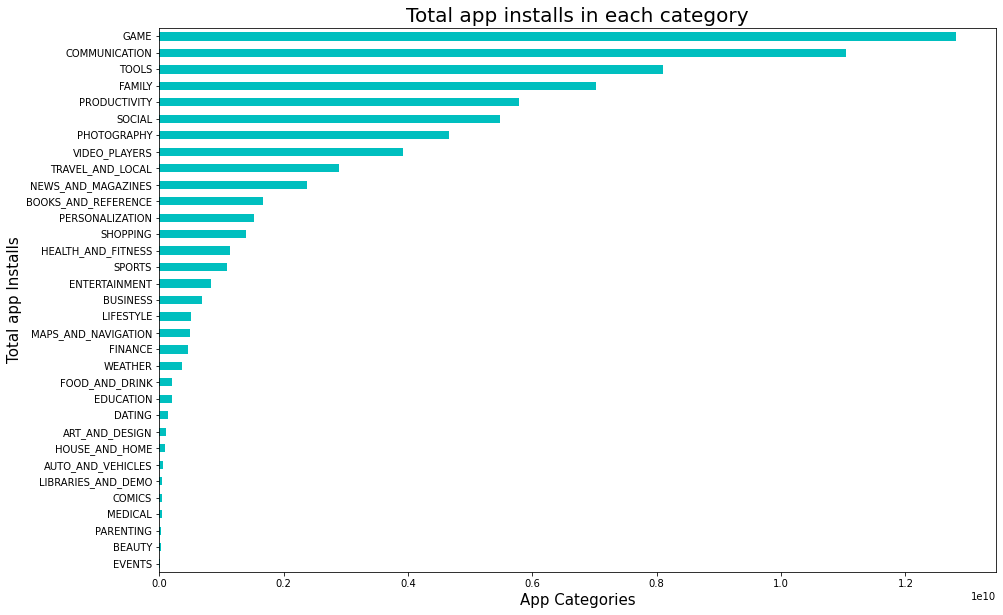

In [ ]:
# total app installs in each category of the play store

a = play_store_df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'c', )
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

## **How does the rating distribution of various app categories look like?**

**Box plot to show Rating vs Category**

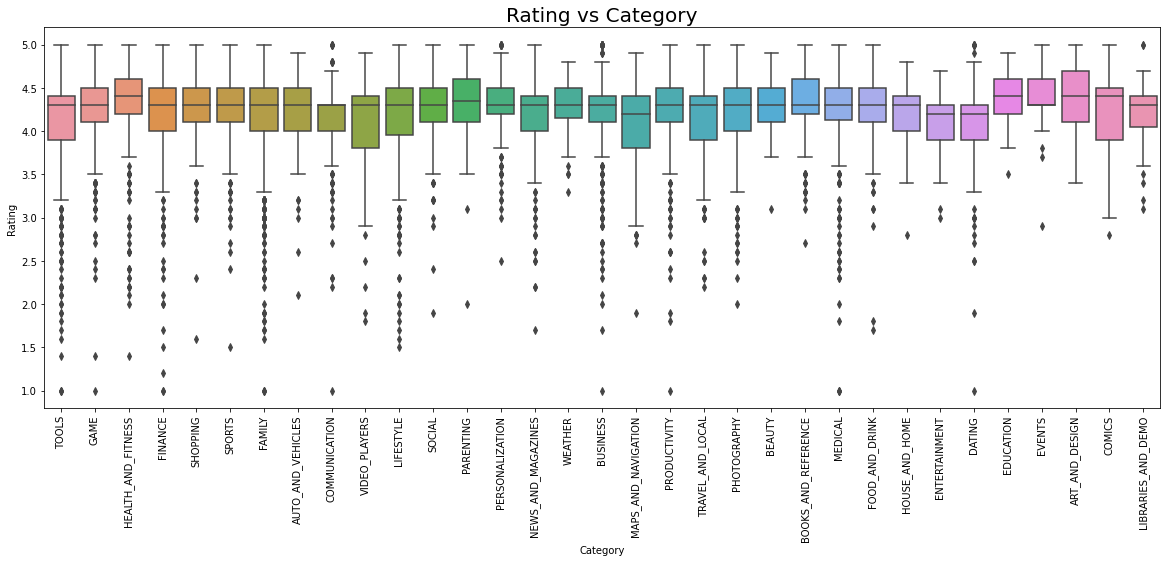

In [ ]:
plt.figure(figsize=(20,7))
plt.title("Rating vs Category", fontsize=20)

sns.boxplot(x='Category', y='Rating', data=play_store_df)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
cat_rating = play_store_df.groupby(['Category'])['Rating'].median().reset_index(name = 'median')
cat_rating.sort_values(by ='median', ascending = False, inplace = True)
cat_rating.head()

,Category,median
0,ART_AND_DESIGN,4.40
5,COMICS,4.40
15,HEALTH_AND_FITNESS,4.40
8,EDUCATION,4.40
22,PARENTING,4.35


In [ ]:
cat_rating.tail()

,Category,median
2,BEAUTY,4.3
32,WEATHER,4.3
19,MAPS_AND_NAVIGATION,4.2
9,ENTERTAINMENT,4.2
7,DATING,4.2


* Top 5 Category with highest ratings are - ART_AND_DESIGN, COMICS, EDUCATION, HEALTH_AND_FITNESS, EDUCATION, PARENTING
* Last 5 Category with lowest ratings are- DATING, ENTERTAINMENT, MAPS_AND_NAVIGATION, WEATHER, BEAUTY

##**Top categories on Google Playstore**

In [ ]:
# Top 10 installed apps
play_store_df.Category.value_counts()

FAMILY                 1858
GAME                    946
TOOLS                   827
BUSINESS                418
MEDICAL                 394
PRODUCTIVITY            373
PERSONALIZATION         373
LIFESTYLE               363
FINANCE                 337
SPORTS                  325
COMMUNICATION           316
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      253
SOCIAL                  237
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        218
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           162
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               109
ENTERTAINMENT            91
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   63
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [ ]:
def findtop10incategory(str):
  '''
  This function used for find out top 10 app present in Category column,
  with thier each respective category.
  '''
  str = str.upper()
  top10 = play_store_df[play_store_df['Category'] == str]
  top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
  
  plt.figure(figsize=(15,12))
  plt.title(f'Top 10 Installed Apps in {str} category',size = 20)  
  
  graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
  plt.xticks(rotation=90)

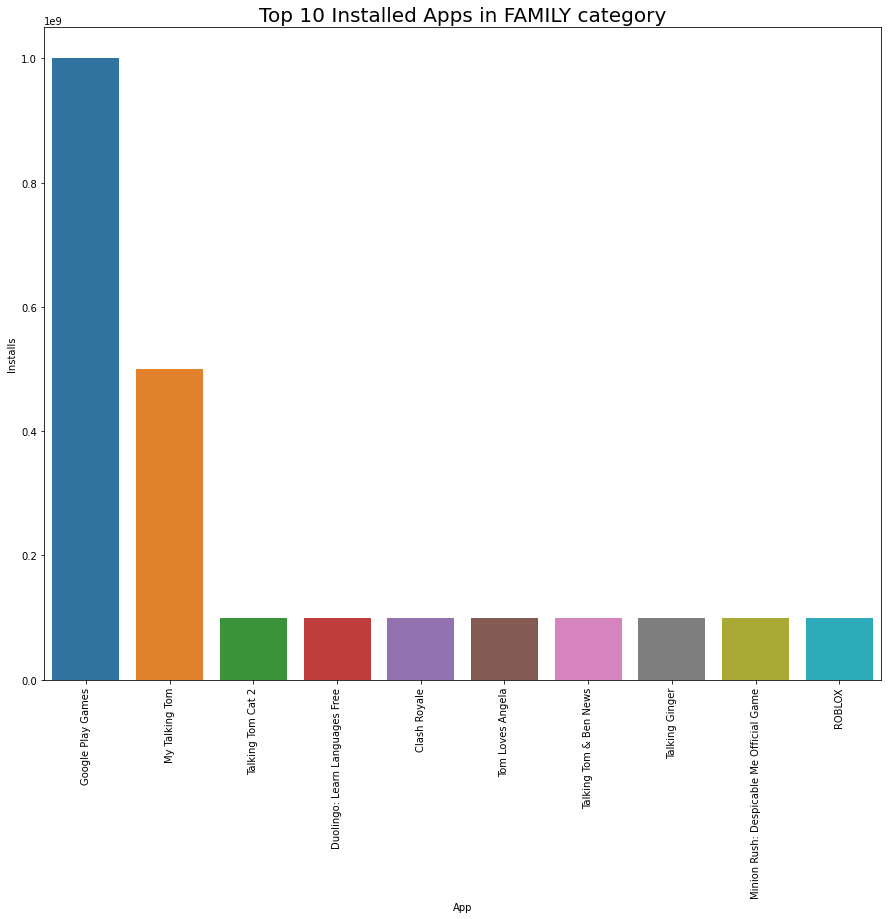

In [ ]:
findtop10incategory('FAMILY')

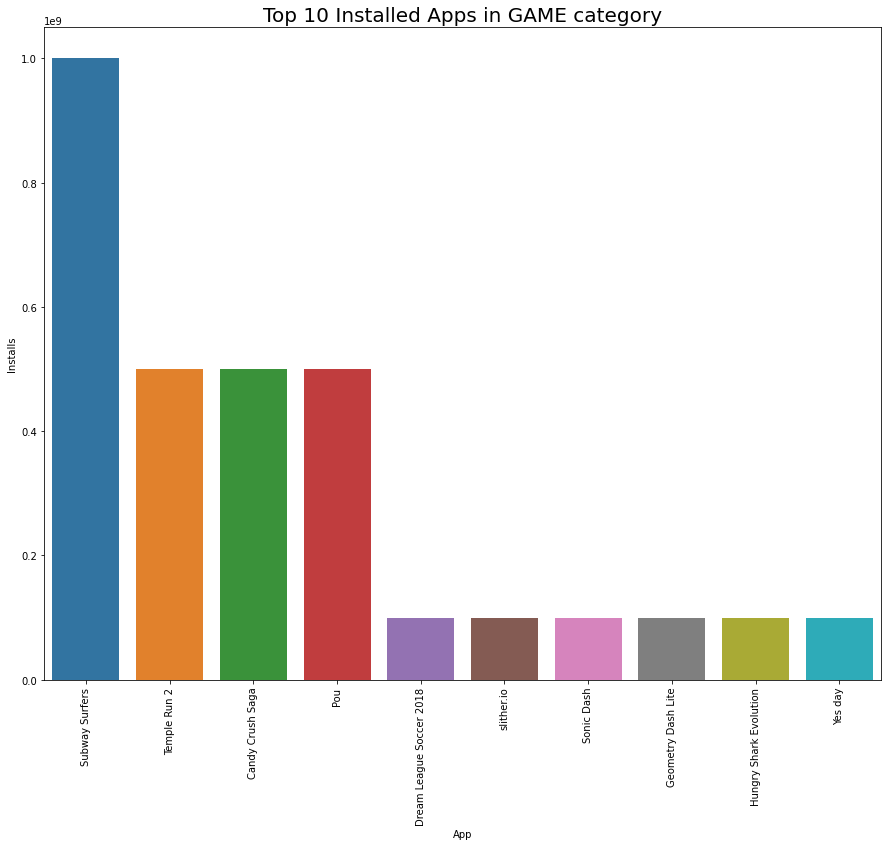

In [ ]:
findtop10incategory('Game')

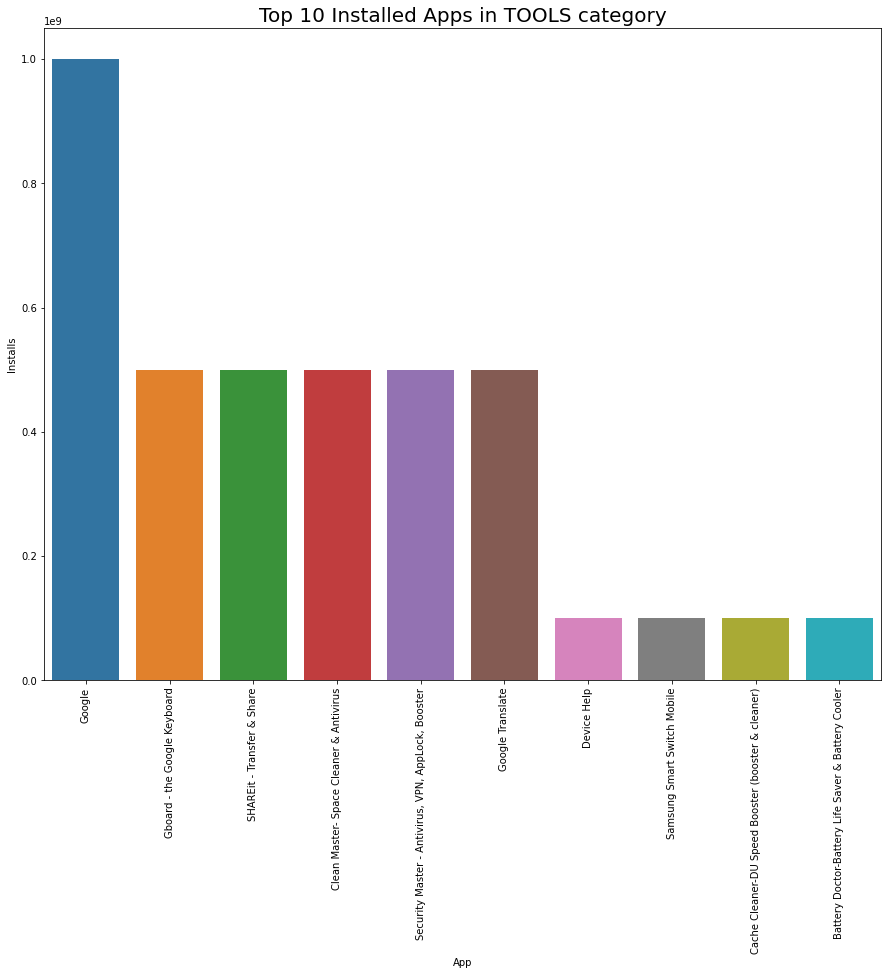

In [ ]:
findtop10incategory('Tools')

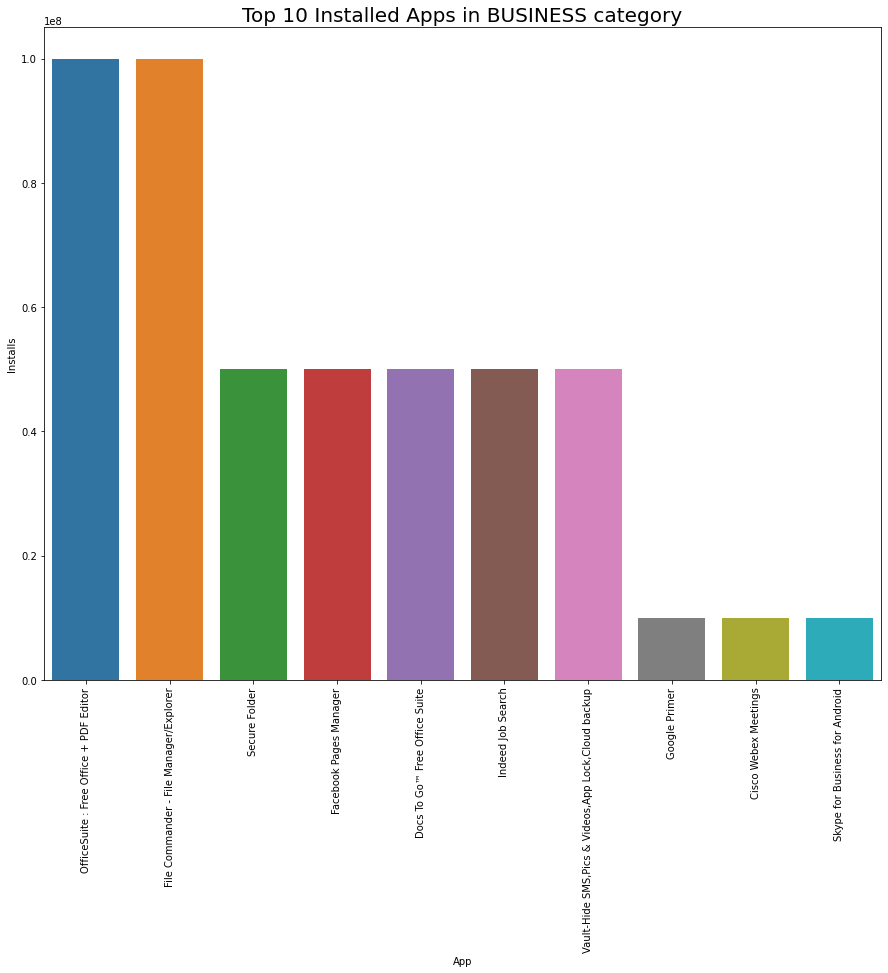

In [ ]:
findtop10incategory('Business')

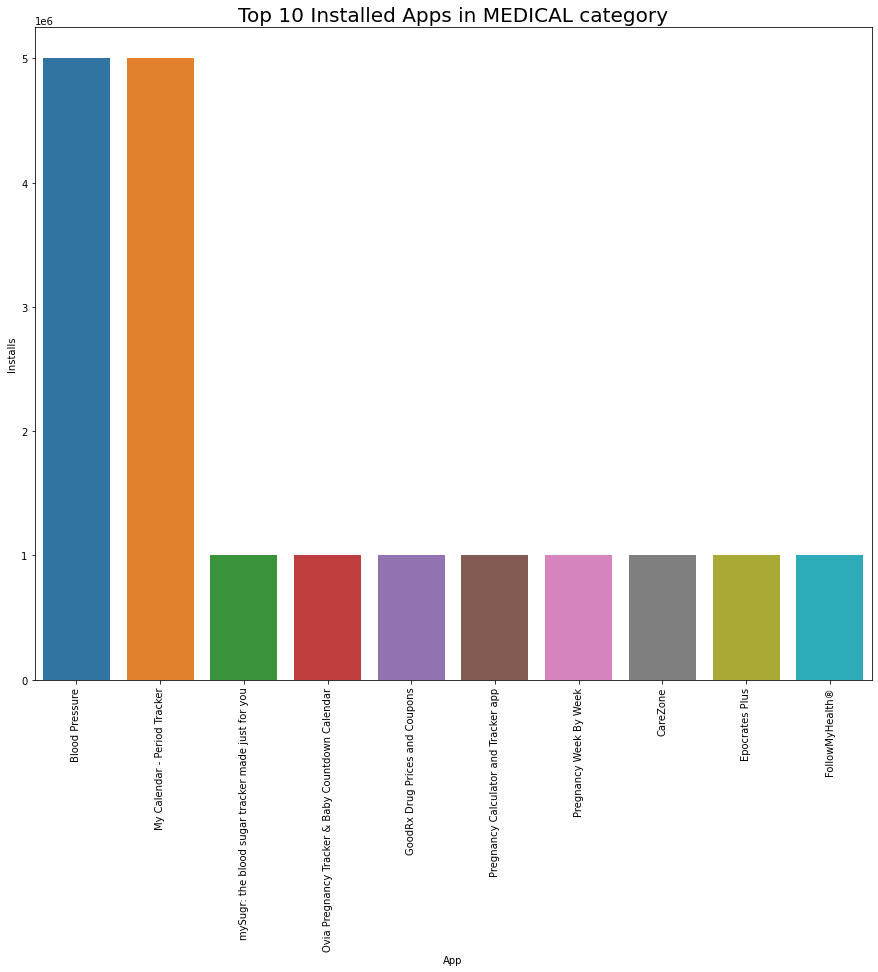

In [ ]:
findtop10incategory('Medical')

##**Most downloaded apps based on Genres**

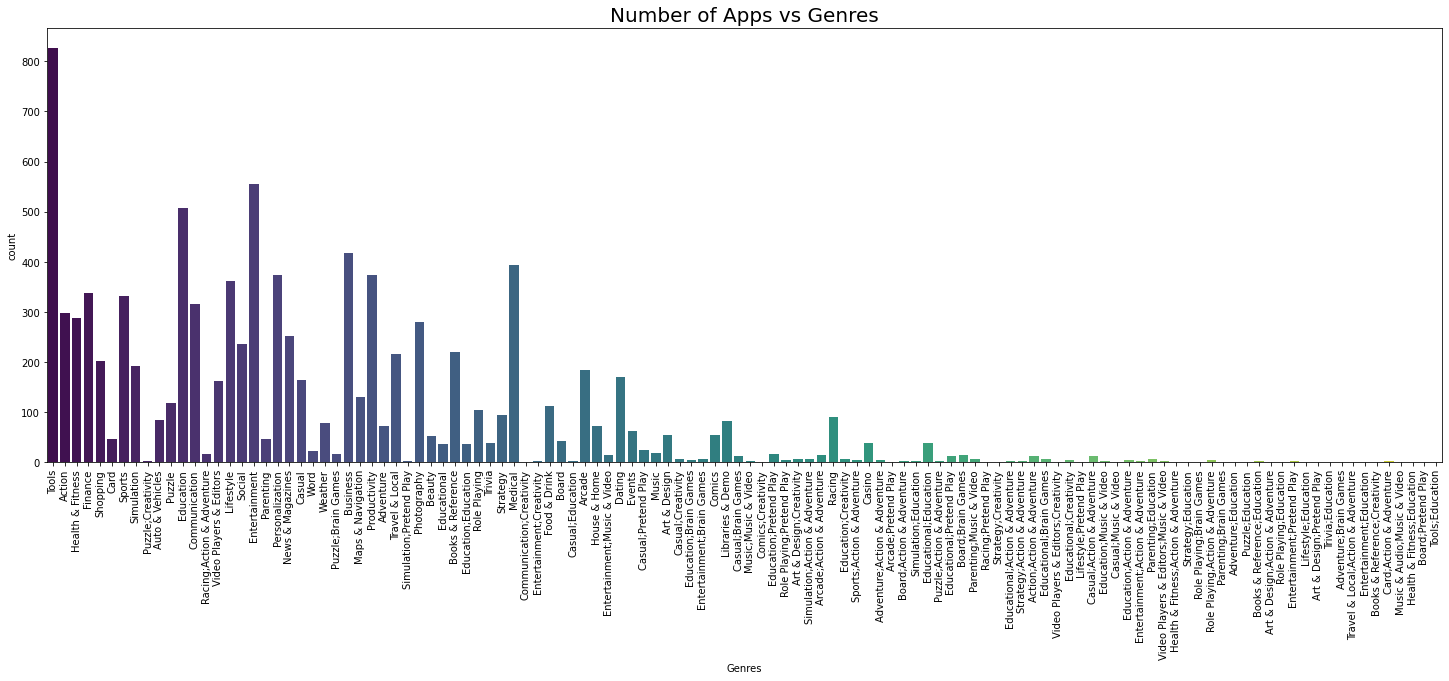

In [ ]:
plt.figure(figsize=(25,8))
plt.title("Number of Apps vs Genres", fontsize=20)

ax=sns.countplot(x = 'Genres', data = play_store_df, palette= "viridis")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
gen_count = play_store_df.groupby(['Genres']).size().reset_index(name = 'count')
gen_count.sort_values(by ='count', ascending = False, inplace = True)
gen_count.head()

,Genres,count
107,Tools,826
51,Entertainment,556
38,Education,507
22,Business,418
70,Medical,394


In [ ]:
gen_count.tail()

,Genres,count
86,Puzzle;Education,1
76,Parenting;Brain Games,1
5,Adventure;Education,1
31,Casual;Music & Video,1
12,Art & Design;Pretend Play,1



* Most number of apps in play store are - Tools, Entertainment, Education, Business & Medical.
* Least number of apps in play store are - Puzzle;Education, Parenting;Brain Games, Adventure;Education, Casual;Music & Video, Art & Design;Pretend Play.

##**which Category of Apps have more Content Rating ?**

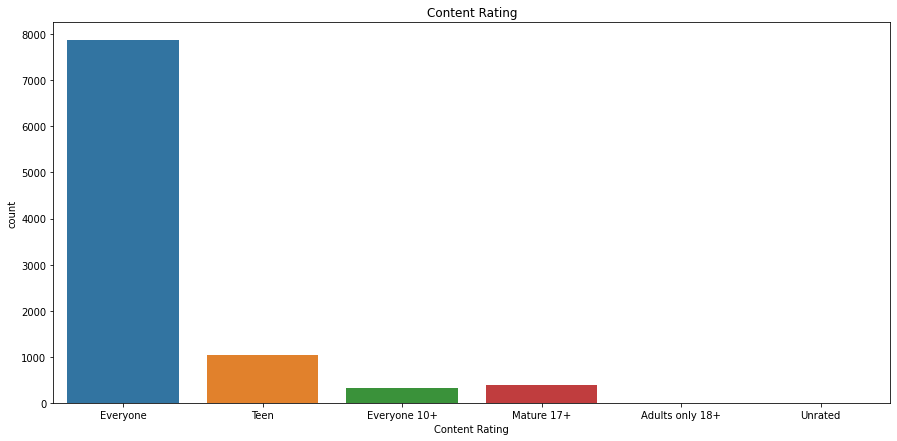

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Content Rating")

sns.countplot(x = 'Content Rating', data = play_store_df)
plt.show()

A majority of the apps in the play store are can be used by everyone.The remaining apps have various age restrictions to use it

##**What is the ratio of number of Paid apps and Free apps?**

In [ ]:
app_type_count=play_store_df.Type.value_counts()
app_type_count

Free    8893
Paid     725
Name: Type, dtype: int64

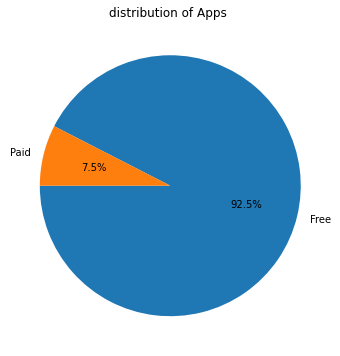

In [ ]:
plt.figure(figsize=(12,6))
plt.title("distribution of Apps ")
plt.pie(app_type_count, labels=app_type_count.index, autopct='%1.1f%%', startangle=180);

From the above graph we can see that 92% of apps in google play store are free and 8%are paid.

##**What is the Rating distribution of free and paid apps?**

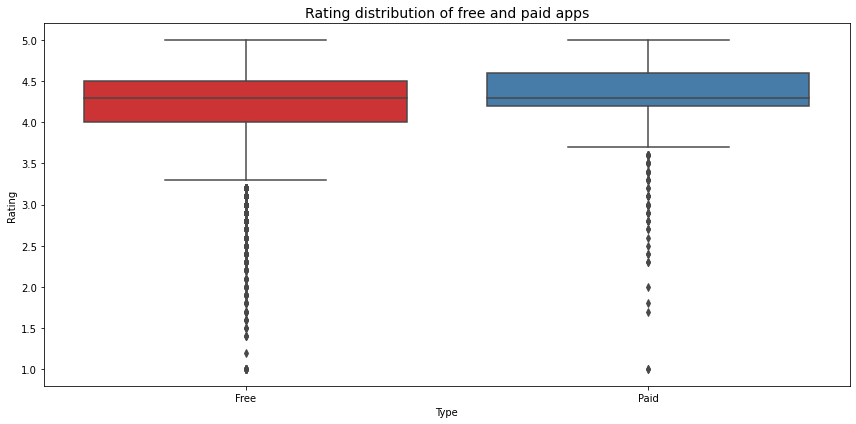

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Type',y='Rating',data=play_store_df,palette='Set1')
plt.title('Rating distribution of free and paid apps',size=14)
plt.tight_layout()


Paid apps are slightly better rated than free apps

##**How does the App rating and Number of installs vary with year of last update?**

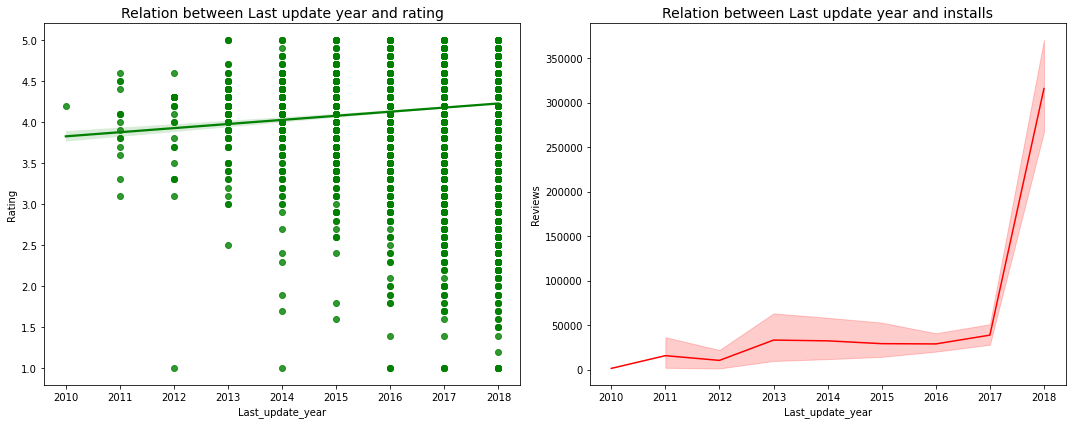

In [ ]:
fig = plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.regplot(x='Last_update_year',y='Rating',data=play_store_df,scatter=True,color='green')
plt.title('Relation between Last update year and rating',size=14)

plt.subplot(1,2,2)
sns.lineplot(x='Last_update_year',y='Reviews',data=play_store_df,color='red')
plt.title('Relation between Last update year and installs',size=14)
plt.tight_layout()

* From the above plots,we can conclude that Apps which has been updated recently have higher chances of receiving better ratings and higher number of installations.
* Apps that are updated often tend to receive better ratings. Because users are aware that the developers are striving to improve the app and are paying attention to their feedback.
* The more dedicated you are to your product, the higher your rating will be.

##**What is the distribution of prices for paid apps and how does the price of the app influence ratings and installs**



In [ ]:
#creating a dataframe consisting of paid apps
Paid_df=play_store_df[play_store_df['Type']=='Paid']

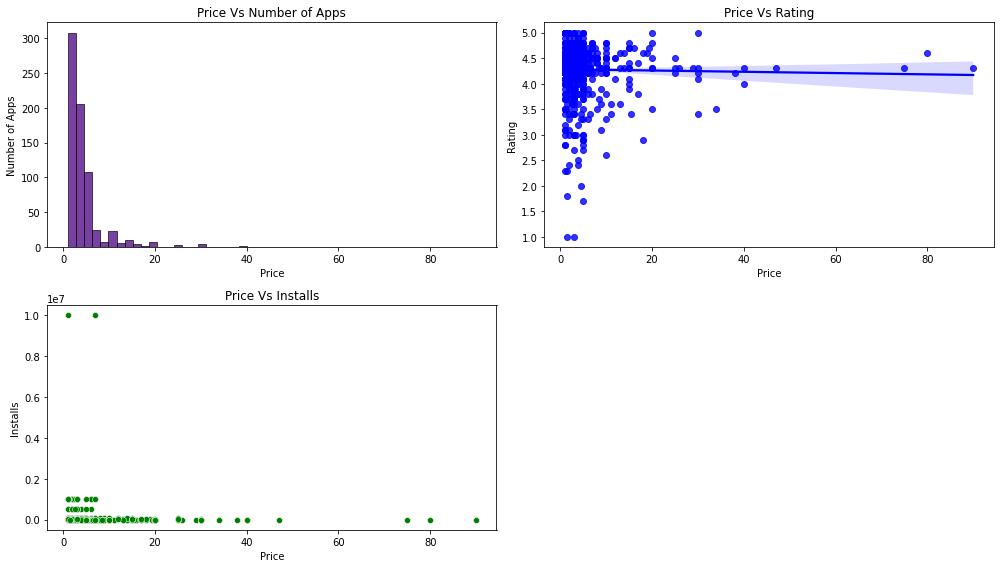

In [ ]:

fig = plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
sns.histplot(Paid_df['Price'],color='indigo',bins=50)
plt.title('Price Vs Number of Apps')
plt.ylabel('Number of Apps')

plt.subplot(2,2,2)
sns.regplot(x='Price',y='Rating',data=Paid_df,color='blue')
plt.title('Price Vs Rating')

plt.subplot(2,2,3)
sns.scatterplot(x='Price',y='Installs'
,data=Paid_df,color='green')
plt.title('Price Vs Installs')

plt.tight_layout()

* Most of the paid apps have price below 10$.
* The rating and number of downloads of the paid apps seems to decrease with increase in price

##**Apps that have made the highest-earning**

<Axes: xlabel='Price'>

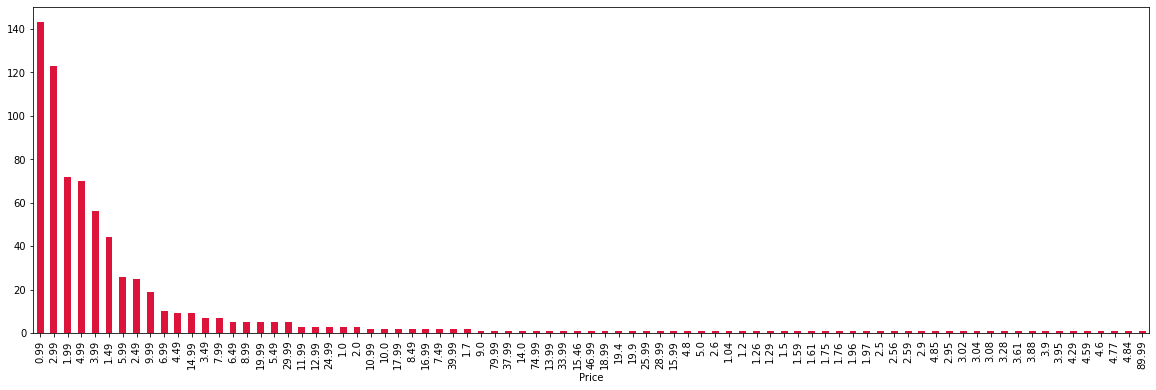

In [ ]:
Paid_df.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,6), color = 'crimson')

* The paid apps charge the users a certain amount to download and install the app. This amount varies from one app to another.
* There are a lot of apps that charge a small amount whereas some apps charge a larger amount. In this case the price to download an app varies from USD 0.99 to USD 400.
* In order to select the top paid apps, it won't be fair to look just into the numer of installs. This is because the apps that charge a lower installation fee will be installed by more number of people in general.
* Here a better way to determine the top apps in the paid category is by finding the revenue it generated through app installs.
* This is given by:

 Total Earning = (Number of installs)x(Price to install the app)


In [ ]:
# Creatng a new column 'Revenue' in paid_df
Paid_df['Revenue'] = Paid_df['Installs']*Paid_df['Price']
Paid_df.head()

<ipython-input-99-e1ed3e04c986>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Paid_df['Revenue'] = Paid_df['Installs']*Paid_df['Price']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_update_year,Revenue
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35.0,2.4,1000,Paid,7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up,2018,7990.0
7328,"Ultimate Public Campgrounds (Over 37,100 in US...",TRAVEL_AND_LOCAL,4.7,213.0,6.1,5000,Paid,3.99,Everyone,Travel & Local,2018-08-05,1.8.8.0,4.4 and up,2018,19950.0
6766,Little Magnet BT Pro,TOOLS,4.6,251.0,3.8,1000,Paid,0.99,Everyone,Tools,2018-08-05,4.1.4,4.2 and up,2018,990.0
4577,PitchBlack S - Samsung Substratum Theme “For O...,PERSONALIZATION,4.5,90.0,37.0,1000,Paid,1.99,Everyone,Personalization,2018-08-04,12.6,7.0 and up,2018,1990.0
2423,ABG Master,MEDICAL,4.3,2.0,1.8,50,Paid,0.99,Everyone,Medical,2018-08-04,1.1,4.1 and up,2018,49.5


In [ ]:
# Top app in the paid category

Paid_df[Paid_df['Revenue'] == Paid_df['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_update_year,Revenue
2241,Minecraft,FAMILY,4.5,2376564.0,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,2018,69900000.0


In [ ]:
# Top 10 paid apps in the play store
top10paid_apps=Paid_df.nlargest(10, 'Revenue', keep='first')
top10paid_apps['App']

2241                        Minecraft
4034                    Hitman Sniper
7417    Grand Theft Auto: San Andreas
2950              Facetune - For Free
5578          Sleep as Android Unlock
8804              DraStic DS Emulator
4133                     Weather Live
7355                          Threema
8860                      Bloons TD 5
9941                           Tasker
Name: App, dtype: object

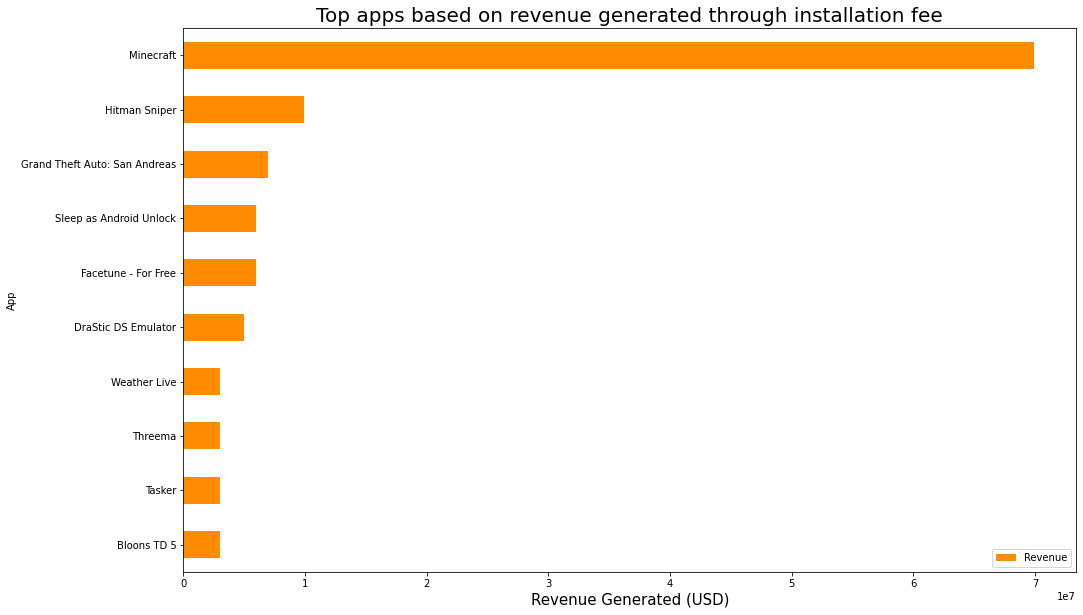

In [ ]:
# Top paid apps according to the revenue generated through installs alone
top10paid_apps.groupby('App')['Revenue'].mean().sort_values(ascending= True).plot.barh(figsize=(16,10), color='darkorange')
plt.xlabel('Revenue Generated (USD)', size=15)
plt.title('Top apps based on revenue generated through installation fee', size=20)
plt.legend()

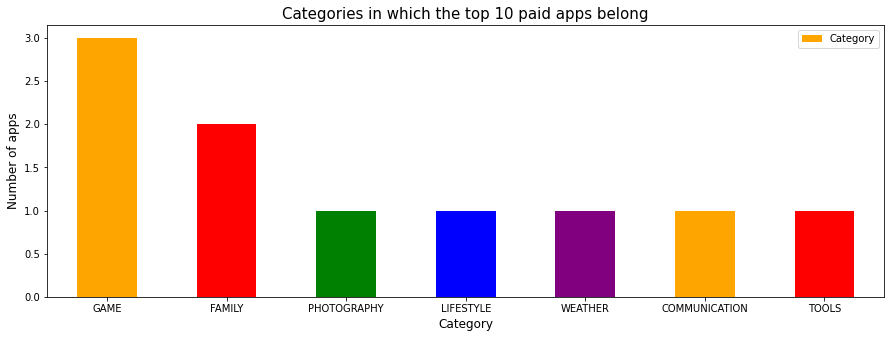

In [ ]:
# Categories in which the top 10 paid apps belong to
top10paid_apps['Category'].value_counts().plot.bar(figsize=(15,5), color= ["orange", "red", "green", "blue", "purple"])
plt.xlabel('Category',size=12)
plt.ylabel('Number of apps',size=12)
plt.title('Categories in which the top 10 paid apps belong', size=15)
plt.xticks(rotation=0)
plt.legend()


## **which are the Top apps that are free?**

In [ ]:
# Creating a df for only free apps
free_df = play_store_df[play_store_df['Type'] == 'Free']

In [ ]:
top_free_df = free_df[free_df['Installs'] == free_df['Installs'].max()]

In [ ]:
top_free_df['App']

3232                          Google Street View
2884                               Google Photos
3454                                Google Drive
3687                     Google Play Movies & TV
3234                                      Google
3943                                    Facebook
4234               Skype - free IM & video calls
3904                          WhatsApp Messenger
152                            Google Play Books
340                                        Gmail
3928                                     YouTube
4104    Messenger – Text and Video Chat for Free
3996                Google Chrome: Fast & Secure
3736                                 Google News
3223                   Maps - Navigate & Explore
3909                                   Instagram
4144                                     Google+
464                                     Hangouts
5856                           Google Play Games
1872                              Subway Surfers
Name: App, dtype: ob

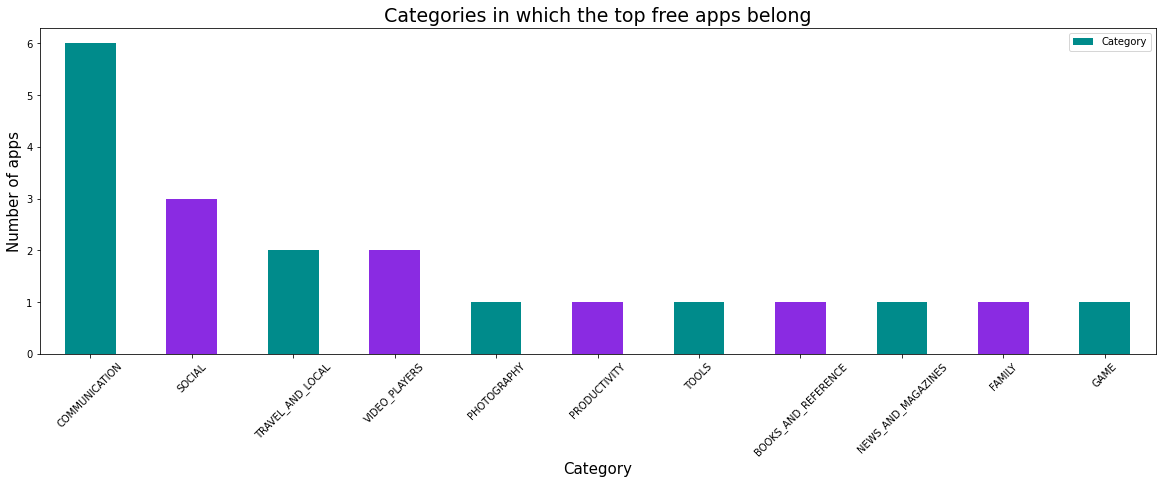

In [ ]:
# Categories in which the top free apps belong to
top_free_df['Category'].value_counts().plot.bar(figsize=(20,6), color= ('darkcyan','blueviolet'))
plt.xlabel('Category', size=15)
plt.ylabel('Number of apps', size=15)
plt.title('Categories in which the top free apps belong', size=19)
plt.xticks(rotation=45)
plt.legend()


## **What are the apps in Play store which have 1 billion downloads?**

Text(0, 0.5, '(App name, Category)')

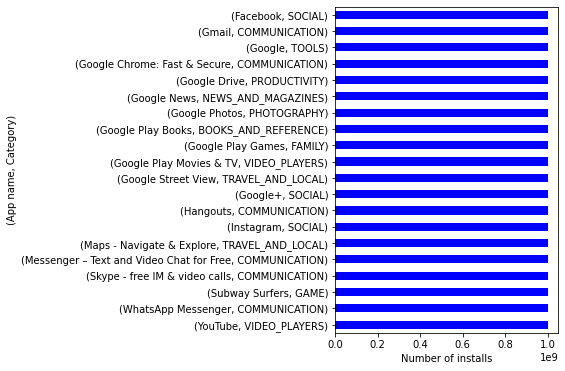

In [ ]:
play_store_df.groupby(['App','Category'])['Installs'].sum().nlargest(20).plot.barh(figsize=(4,6), color='blue').invert_yaxis()
plt.xlabel('Number of installs')
plt.ylabel('(App name, Category)')
     

There are 20 apps in play store that have crossed 1B downloads.There are 6 apps from COMMUNICATION,3 from SOCIAL categories

In [ ]:
#Category of apps that have crossed 100 M downloads
play_store_df.loc[play_store_df['Installs']==10**9,['App','Category']].groupby('Category')['App'].count()

Category
BOOKS_AND_REFERENCE    1
COMMUNICATION          6
FAMILY                 1
GAME                   1
NEWS_AND_MAGAZINES     1
PHOTOGRAPHY            1
PRODUCTIVITY           1
SOCIAL                 3
TOOLS                  1
TRAVEL_AND_LOCAL       2
VIDEO_PLAYERS          2
Name: App, dtype: int64

## **What is size distribution of apps ? How does the size affect the rating and number of downloads of the app?**

In [ ]:
# segment and sort the numeric data values in Size column into bins
#Creating Size_groups
def size_group(app_size):
  '''
  This function is used to segment and sort numeric data values in Size column into groups
  '''
  if app_size<1:
    return('<1MB')
  elif app_size>1 and app_size<=10:
    return('1MB-10MB') 
  elif app_size>10 and app_size<=20:
    return('10MB-20MB')
  elif app_size>20 and app_size<=30:
    return('20MB-30MB')
  elif app_size>30 and app_size<=40:
    return('30MB-40MB')
  elif app_size>40 and app_size<=50:
    return('40MB-50MB')
  elif app_size>50 and app_size<=60:
    return('50MB-60MB') 
  elif app_size>60 and app_size<=70:
    return('60MB-70MB')
  elif app_size>70 and app_size<=80:
    return('70MB-80MB')
  elif app_size>80 and app_size<=90:
    return('80MB-90MB')
  elif app_size>90 and app_size<=100:
    return('90MB-100MB')   
  else:
    return('Varies with device')  

In [ ]:
#Creating size group from 'Size' column
play_store_df['Size_group']=play_store_df['Size'].apply(lambda x:size_group(x))

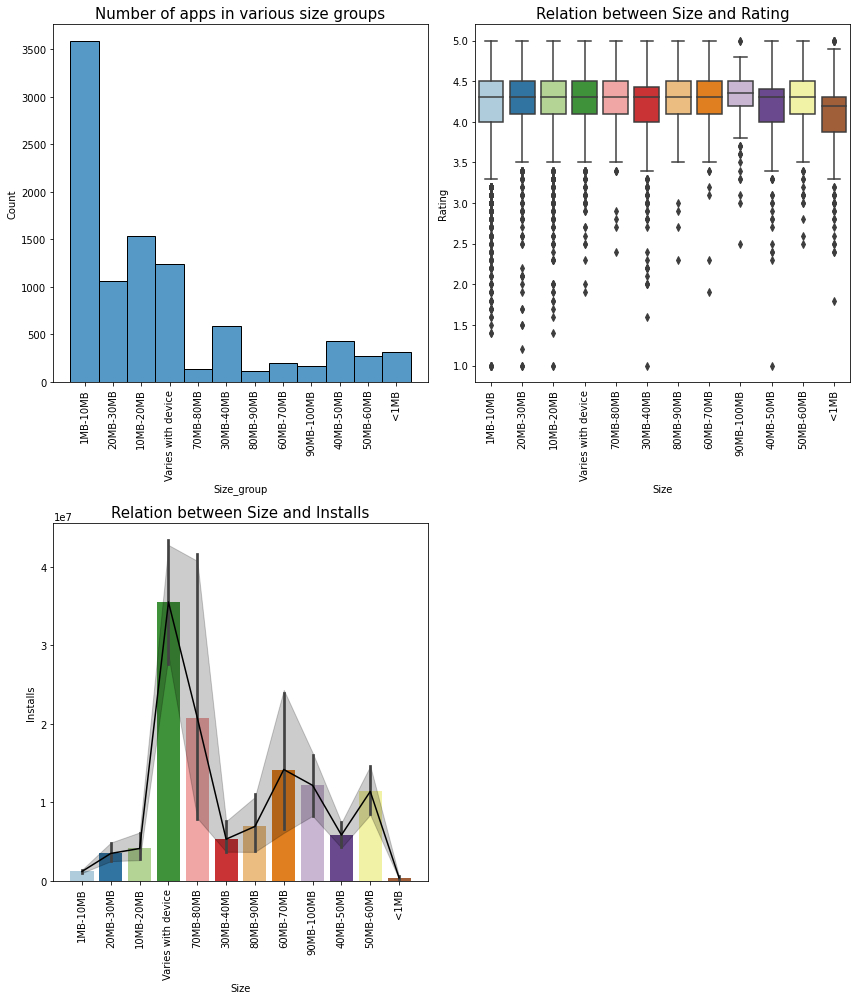

In [ ]:
fig = plt.figure(figsize=(12,14))

plt.subplot(2,2,1)
sns.histplot(play_store_df['Size_group'])
plt.title('Number of apps in various size groups',size = 15)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('Relation between Size and Rating',size = 15)
sns.boxplot(x='Size_group',y='Rating',data=play_store_df,palette='Paired')
plt.xlabel("Size")
plt.ylabel("Rating")
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.title('Relation between Size and Installs',size = 15)
sns.barplot(x='Size_group',y='Installs',data=play_store_df,palette='Paired',dodge=True)
sns.lineplot(x='Size_group',y='Installs',data=play_store_df,color='black')
plt.xlabel("Size")
plt.ylabel("Installs")
plt.xticks(rotation=90)

plt.tight_layout()

* Regardless of the size,most of the apps in all size ranges have managed to receive ratings above 4 (median value) . As size of app increases,it is less likely to receive poor ratings(below 3).It could due to availabilty of more features with the increasing size of the app.
* Apps with size that varies with device are downloaded the most
* Apps with size less than 1 MB have least downloads.

## **How does Size distribution of Apps belonging to different categories look like?**

Text(0.5, 1.0, 'Size distribution for different categories of apps ')

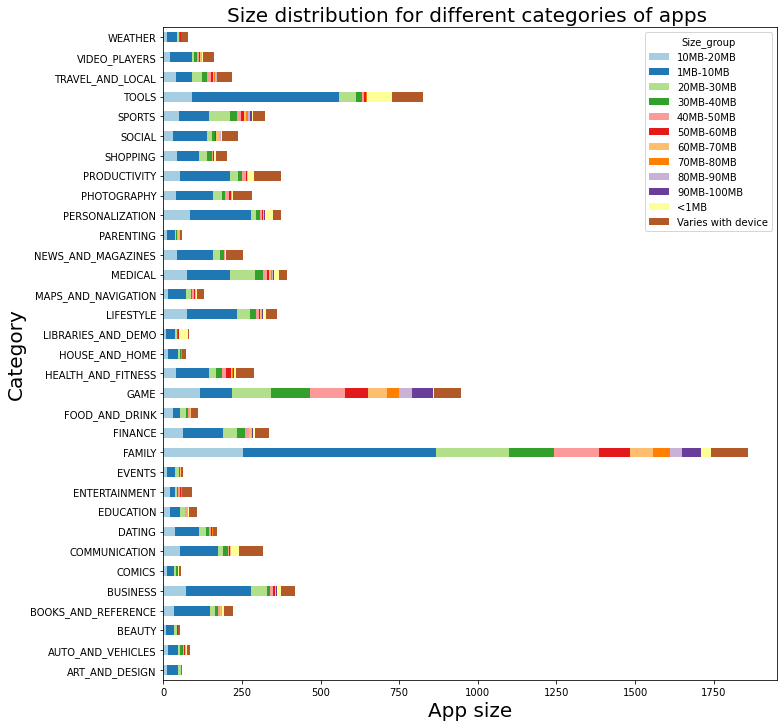

In [ ]:
category_size = play_store_df.groupby(['Category','Size_group'])['Size_group'].count().unstack('Size_group')
colors=[i for i in np.arange(0,2.2,0.1)]
category_size.plot(kind='barh', stacked=True,figsize=(11,12),color=plt.cm.Paired.colors)
plt.xlabel("App size",size=20)
plt.ylabel("Category",size=20)
plt.title('Size distribution for different categories of apps ',size = 20)
     

* The majority of applications in the Play Store are between 1MB-10MB in size.
* Family has a wider distribution of sizes.
* There are least number of apps with a size of less than 1 MB.

#**Merging the User Review dataset with the Play Store dataset.**

In [ ]:

final_df = pd.merge(left=play_store_df,right=user_df,how='inner',on='App')
final_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_update_year,Size_group,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
30420,Happy Fruits Bomb - Cube Blast,FAMILY,4.5,2150.0,20.0,500000,Free,0.0,Everyone,Casual;Brain Games,2018-02-01,1.0.3122,4.0.3 and up,2018,10MB-20MB,Just ok fun game,Positive,0.133333,0.366667
28619,Hello Kitty Nail Salon,FAMILY,4.2,369378.0,24.0,50000000,Free,0.0,Everyone,Casual;Pretend Play,2018-04-17,1.5,4.1 and up,2018,20MB-30MB,It cole get ever want cole get free games also...,Positive,0.400000,0.800000
13431,GMX Mail,COMMUNICATION,4.3,258556.0,NaN,10000000,Free,0.0,Everyone,Communication,2018-07-25,Varies with device,Varies with device,2018,Varies with device,Quite good,Positive,0.700000,0.600000
8772,Guns of Glory,GAME,4.0,120592.0,77.0,10000000,Free,0.0,Everyone 10+,Strategy,2018-07-31,2.0.2,4.0.3 and up,2018,70MB-80MB,Thank nice saree Lagi,Positive,0.600000,1.000000
2353,Backgrounds HD (Wallpapers),PERSONALIZATION,4.6,2390099.0,NaN,100000000,Free,0.0,Teen,Personalization,2018-08-04,Varies with device,Varies with device,2018,Varies with device,Loved I turn super annoying vibration off...,Positive,0.077778,0.788889


##**Correlation heat map for the merged dataset.**

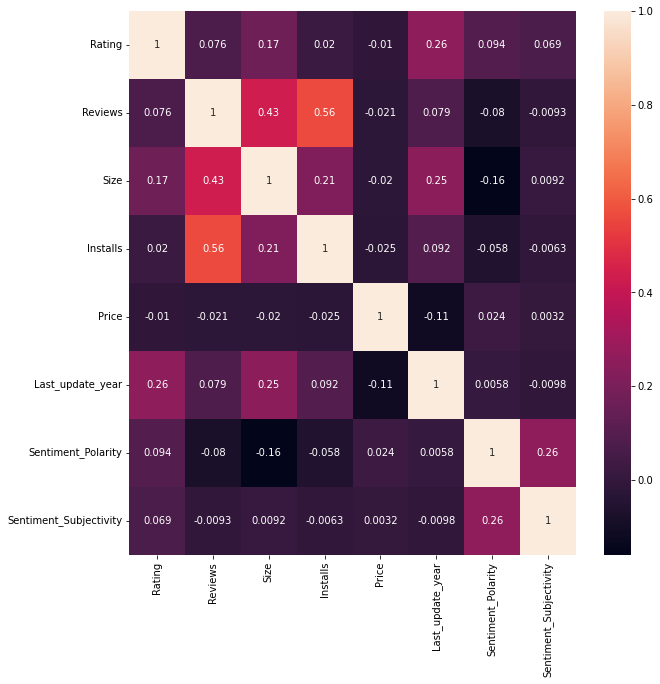

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(final_df.corr(), annot = True)
plt.show()

Relationship between Install and Reviews is 0.56

## **Percentage of Review Sentiments**

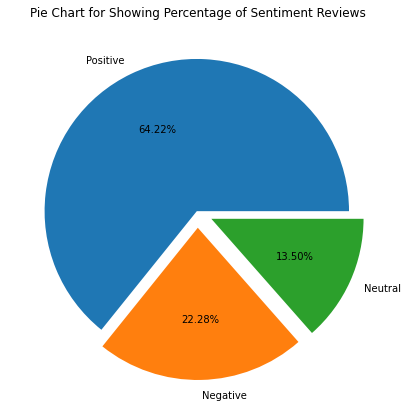

In [ ]:
plt.figure(figsize = (7,7))
plt.title('Pie Chart for Showing Percentage of Sentiment Reviews')

final_df['Sentiment'].value_counts().plot.pie(autopct = '%1.2f%%', explode=(0.01,0.1,0.1))
plt.axis('off')
plt.show()

The graph shows that there are 64.22% positive reviews, 13.50% Neutral reviews and 22.28% Negative reviews.


## **Reviews of apps**

App ratings and reviews left by consumers on Google PlayStore have a major impact on how Android users perceive your app. By looking at the app's reviews, a person can assess if the app works properly, caters to their requirement and addresses their issues.Then they'll decide whether or not to download the app.

Here,the merged dataframe is used to determine whether the sentiment regarding the app is good, negative, or neutral.

## **Relation between Sentiment Polarity and Subjectivity**

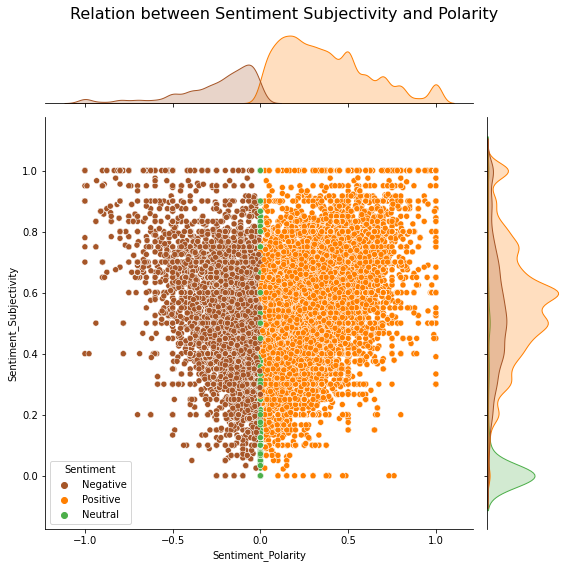

In [ ]:
#Scatter plot of Sentiment Polarity Vs Subjectivity,along with their distribution(kde) plots
p=sns.jointplot(y='Sentiment_Subjectivity', x='Sentiment_Polarity',hue='Sentiment',data=final_df, palette='Set1_r',height=8)#,hue='Sentiment',data=new_df_merged, palette='Set1',height=7)
p.fig.suptitle('Relation between Sentiment Subjectivity and Polarity',size = 16)
p.fig.tight_layout()

* There are more positive reviews than negative reviews, and the number of neutral reviews is the lowest.
* Most user reviews have a sentiment polarity of [-0.5,0,5].
* Highest sentiment subjectivity lies between 0.4 to 0.8 which shows that most of the reviews are towards subjective point of view of the users.

## **Relation between sentiment polarity of user reviews and user rating**

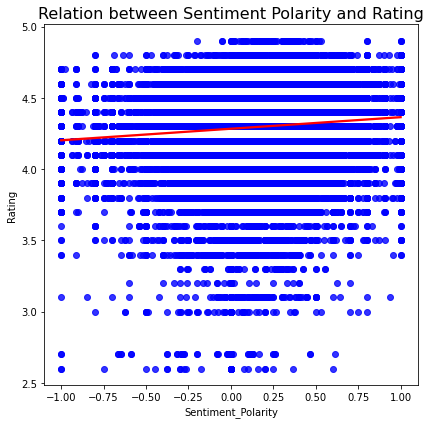

In [ ]:
#Regression plot between sentiment polarity and rating
fig = plt.figure(figsize=(6,6))

plt.title('Relation between Sentiment Polarity and Rating',size = 16)
sns.regplot(x= 'Sentiment_Polarity',y='Rating',
                data=final_df,color='blue',line_kws={"color": "red"})

plt.tight_layout()

Positive reviews are more likely to be given to apps with higher ratings

## **What are the top apps with the most positive reviews, and those with the most negative ones?**

In [ ]:
cat_sentiment= final_df.groupby(['Category', 'Sentiment']).size().reset_index().pivot(columns = 'Sentiment', index = 'Category', values = 0)

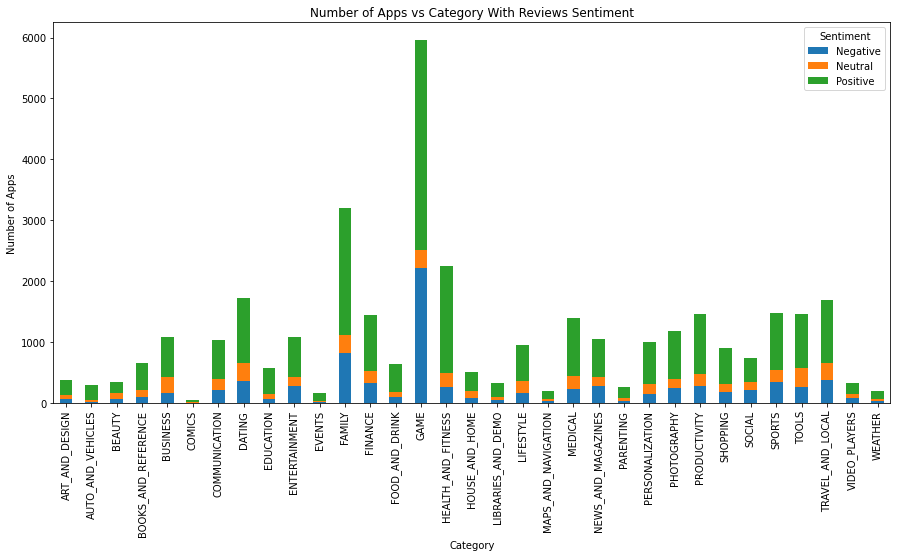

In [ ]:
cat_sentiment.plot(kind = 'bar', stacked = True, figsize=(15,7))
plt.title("Number of Apps vs Category With Reviews Sentiment")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()

Top 5 Categories with most positive reviews are - GAME, FAMILY, HEALTH_AND_FITNESS, DATING, TRAVEL_AND_LOCAL.

In [ ]:
positive_ur_df=user_df[user_df['Sentiment']=='Positive']
positive_ur_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


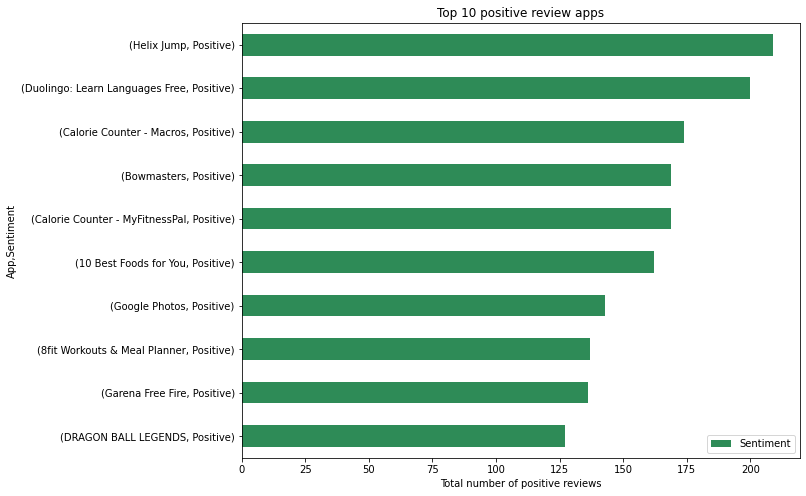

In [ ]:
positive_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='seagreen').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

In [ ]:
negative_ur_df=user_df[user_df['Sentiment']=='Negative']
negative_ur_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


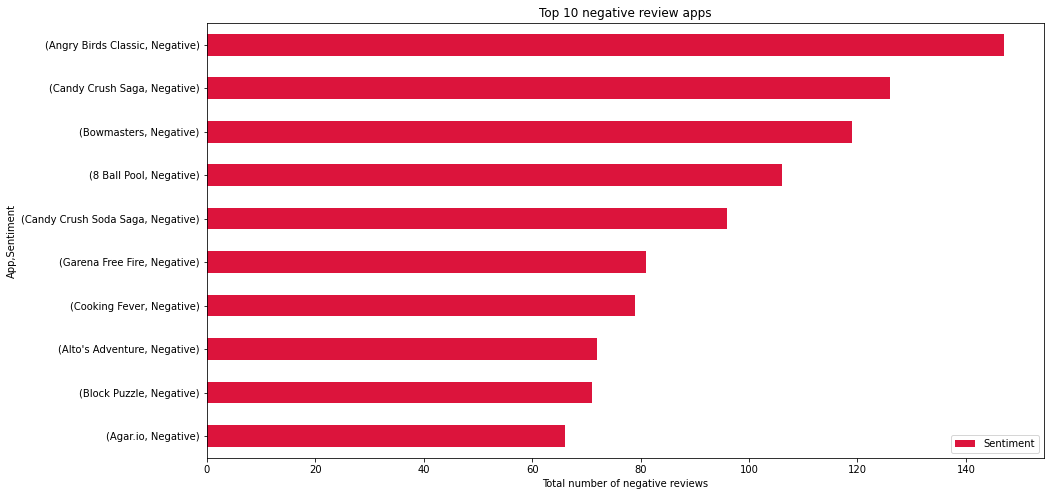

In [ ]:
negative_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8),color='crimson').invert_yaxis()
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')

plt.legend()

## **What are the apps in Play store with most number of reviews?**

In [ ]:
#Top 5 most reviewed apps.
play_store_df.nlargest(5, 'Reviews')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_update_year,Size_group
3943,Facebook,SOCIAL,4.1,78128208.0,NaN,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,2018,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,2018,Varies with device
3909,Instagram,SOCIAL,4.5,66509917.0,NaN,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device,2018,Varies with device
4104,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,2018,Varies with device
1670,Clash of Clans,GAME,4.6,44891723.0,98.0,100000000,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up,2018,90MB-100MB


Text(0, 0.5, '(App name, Category)')

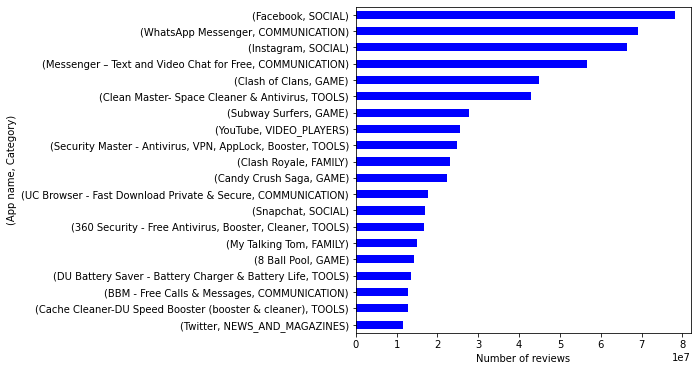

In [ ]:
play_store_df.groupby(['App','Category'])['Reviews'].sum().nlargest(20).plot.barh(figsize=(6,6), color='blue').invert_yaxis()
plt.xlabel('Number of reviews')
plt.ylabel('(App name, Category)')

In [ ]:
#Top 5 most largest size app.
play_store_df.nlargest(5, 'Size')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_update_year,Size_group
9170,Stickman Legends: Shadow Wars,GAME,4.4,38419.0,100.0,1000000,Paid,0.99,Everyone 10+,Action,2018-08-03,2.3.24,4.1 and up,2018,90MB-100MB
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124.0,100.0,5000,Free,0.00,Everyone,Health & Fitness,2018-08-02,2.0.0.11,5.0 and up,2018,90MB-100MB
5530,The Walking Dead: Our World,GAME,4.0,22435.0,100.0,1000000,Free,0.00,Teen,Action,2018-08-01,1.1.0.3,5.0 and up,2018,90MB-100MB
1988,Hungry Shark Evolution,GAME,4.5,6074627.0,100.0,100000000,Free,0.00,Teen,Arcade,2018-07-25,6.0.0,4.1 and up,2018,90MB-100MB
1080,Post Bank,FINANCE,4.5,60449.0,100.0,1000000,Free,0.00,Everyone,Finance,2018-07-23,2.9.12,4.0 and up,2018,90MB-100MB


#**Conclusion:**
In this EDA the given datasets are analysed and several graphs has been plotted which can be used to give more insights to the dataset.

* Apps with size that varies with device have the most number of installs.
* Minecraft is the only app in the paid category with over 10M installs. This app has also produced the most revenue only from the installation fee.
* Apps updated recently have better ratings and number of downloads
* Most of the apps present in the play store are available for everyone, there are very few apps which are having age restrictions. 
* Games has the highest share of apps on playstore.
* Number of free apps present in the play store are higher than paid apps.
    * It's quite evident users prefer to install free apps more as compared to the paid apps.
    * This gives direction that the developers can launch more of the free apps and for earning money.
* Game category has a greater number of positive reviews as well as negative reviews since there is more installs from the Game category.
* From the correlation matrix we can infer that reviews and installs are having a good correlation.
  * It's quite evident as the more number of installs more will be the number of reviews. 
* Sentiment Polarity and Sentiment Subjectivity are slightly correlated.


The dataset contains possibilities to deliver insights to understand customer demands better and thus help developers to popularize the product. Dataset can also be used to look whether the original rating of the app matches the predicted rating to know whether the app is performing better or worse compared to other apps on the Play Store using ML,if required for further analysis.